In [1]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'

x, y = make_classification(
    n_samples=100,
    n_features=10,
    n_informative=4,
    n_redundant=0,
    n_repeated=0,
    n_classes=4,
    n_clusters_per_class=1,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=False,
    random_state=0,
)

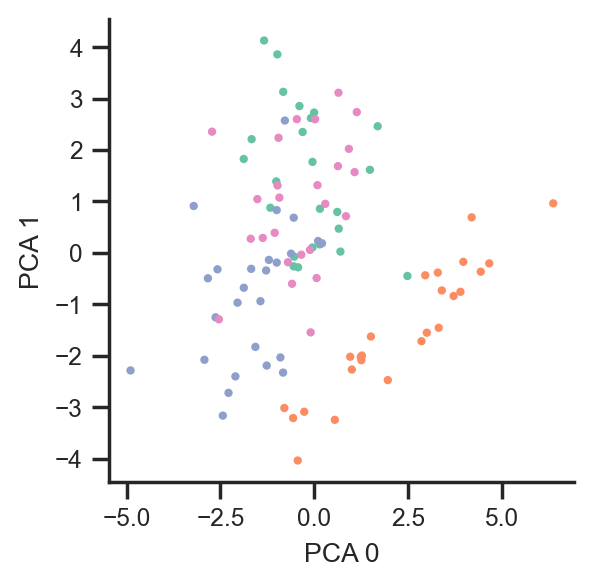

In [2]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

colors = sns.color_palette("Set2", n_colors=4)
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(x_pca[:, 0], x_pca[:, 1], s=4, c=[colors[i] for i in y])
ax.set(xlabel="PCA 0", ylabel="PCA 1")
plt.show()

In [3]:
import pandas as pd

df = pd.DataFrame(x, columns=[f"x{i}" for i in range(1, x.shape[1] + 1)])
df["y"] = y
display(df.describe())

x1          x2          x3          x4          x5          x6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.174441   -0.526342   -0.547355    0.044698   -0.203139    0.052697   
std      1.513534    1.465509    1.386816    1.669687    0.970160    0.925903   
min     -4.253117   -4.608923   -3.757662   -3.731094   -2.249944   -1.899168   
25%     -0.761606   -1.319766   -1.541643   -1.264605   -0.901427   -0.641644   
50%      0.562327   -0.623744   -0.585821    0.078371   -0.169886   -0.046588   
75%      1.229203    0.159207    0.756750    1.169125    0.429892    0.753103   
max      3.447972    4.502641    2.023970    4.131394    1.863284    2.321291   

               x7          x8          x9         x10          y  
count  100.000000  100.000000  100.000000  100.000000  100.00000  
mean    -0.092809    0.015213    0.214711   -0.078876    1.52000  
std      1.097285    0.910337    0.905380    1.031911    1.11446  
min     -2.740608   -2.630248   -1.974531   -3.267423    0.00000  
25%     -0.792966   -0.631512   -0.424702   -0.852932    1.00000  
50%     -0.063038    0.062614    0.208057   -0.004159    2.00000  
75%      0.677745    0.564945    0.814598    0.782273    2.25000  
max      2.249242    2.189457    2.549691    2.157531    3.00000

In [4]:
df_stat = df.groupby("y").describe()

df_stat.xs("mean", level=1, axis=1)

x1        x2        x3        x4        x5        x6        x7  \
y                                                                         
0 -0.418534 -0.780486 -1.542776  1.198543 -0.271921 -0.007240  0.102368   
1 -0.986346  1.037070  0.935931 -1.140884 -0.229696  0.235417 -0.377119   
2  1.001877 -1.648207 -1.184021 -1.034812  0.018757 -0.012710 -0.083654   
3  1.043951 -0.679035 -0.412903  1.245281 -0.341324 -0.004461 -0.005393   

         x8        x9       x10  
y                                
0  0.033257  0.171164 -0.220367  
1  0.283822  0.596551 -0.253075  
2 -0.078554 -0.041802  0.023042  
3 -0.173199  0.141447  0.125162

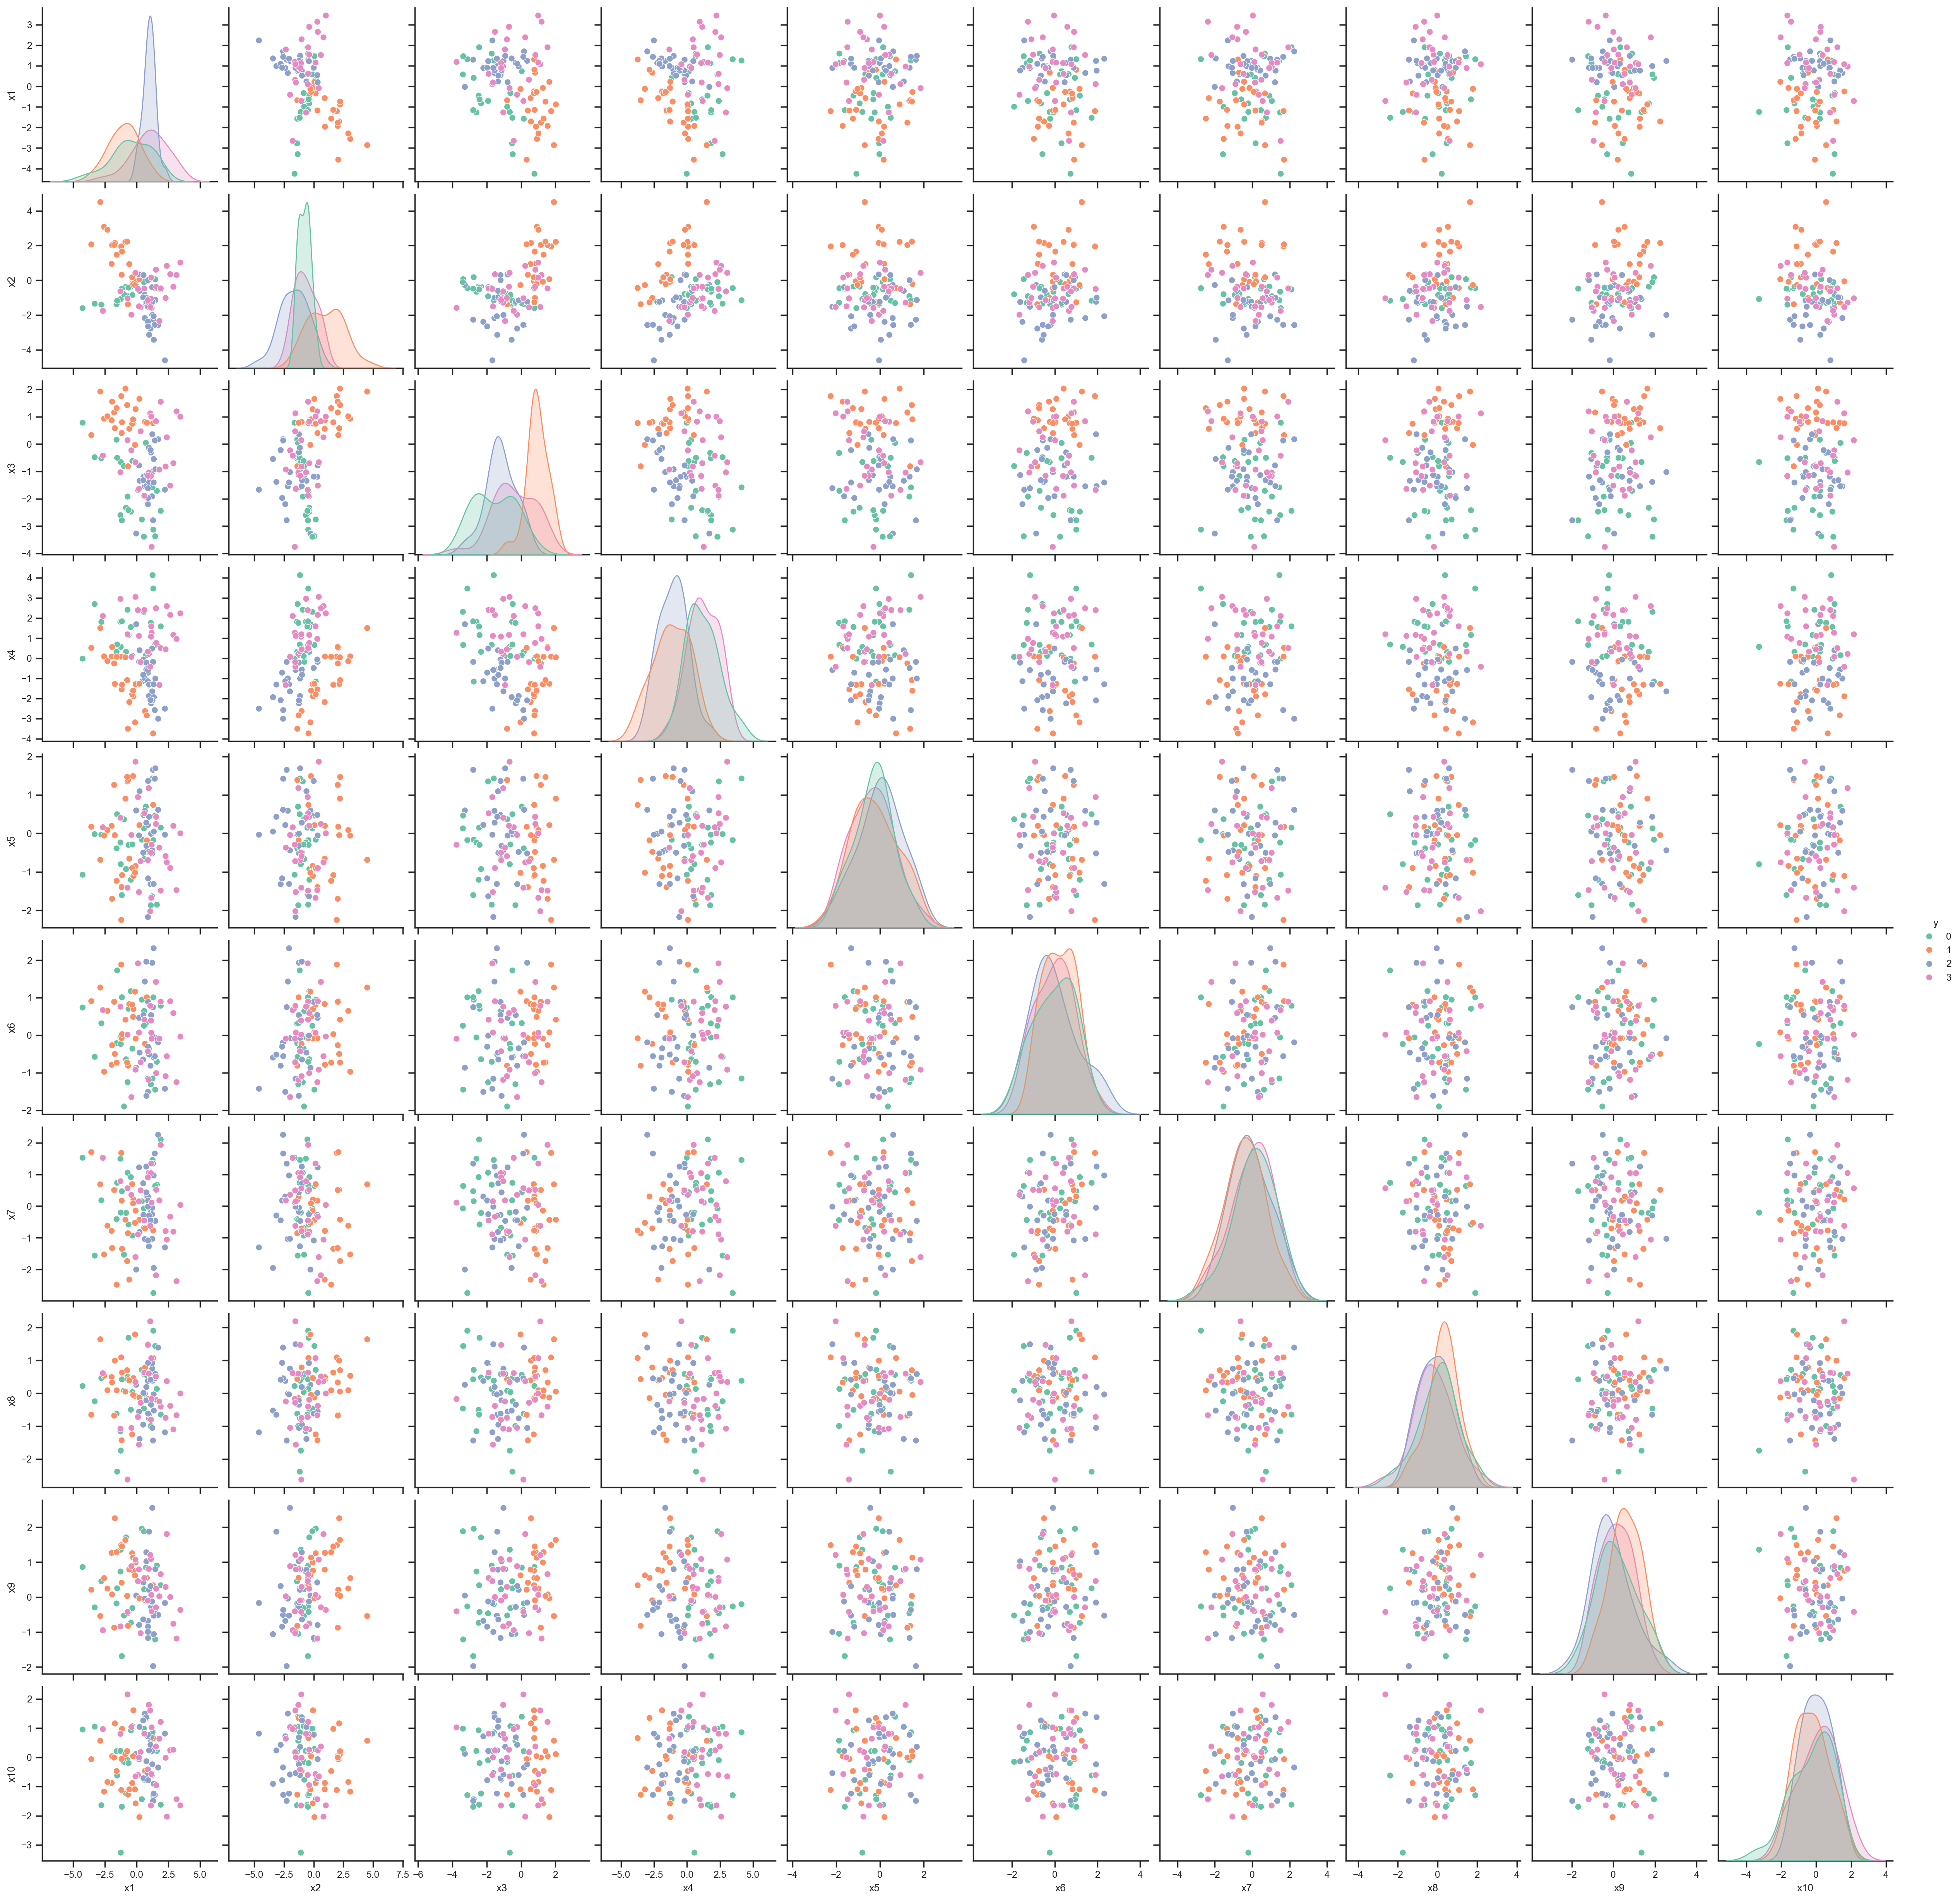

In [5]:
# create pair plot
sns.pairplot(df, hue="y", palette="Set2")